# La Transformación Rápida de Fourier

La transformada de Fourier toma una señal del tiempo en el dominio de frecuencia. Una aplicación de la transformada de Fourier es que podemos recuperar las amplitudes y frecuencias de una señal muestreada.

Usaremos el paquete `numpy.fft`. El código subyacente para estas funciones es una versión modificada y traducida por f2c de las rutinas FFTPACK. FFTPACK [1] es un paquete de subprogramas de Fortran para la transformación rápida de Fourier de secuencias periódicas y otras secuencias simétricas. Incluye transformaciones complejas, reales, seno, coseno y cuarto de onda.

Por ejemplo, considere la señal $2 · \cos(4 · 2\pi t) + 5 · \sin (10 · 2\pi t)$ compuesta de un coseno con amplitud 2, frecuencia 4 y un seno con amplitud 5 y frecuencia 10. Usando `rfft` del paquete `numpy.fft`, el siguiente script calcula la transformada discreta de Fourier en la matriz real de muestras mediante el eficiente algoritmo de Transformación rápida de Fourier. Recuperamos las amplitudes y las frecuencias correspondientes de los componentes de nuestra señal. Con matplotlib graficamos el espectro.

2.0*cos(4*2*pi*t)
5.0*sin(10*2*pi*t)


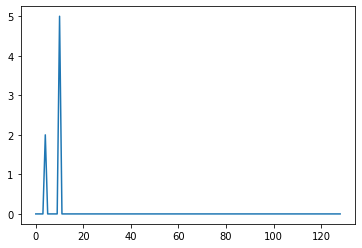

In [16]:
import numpy as np
import matplotlib.pyplot as plt 

f = lambda t: 2*np.cos(4*2*np.pi*t) + 5*np.sin(10*2*np.pi*t) 
n = 256
x = np.arange(0.0,1.0,1.0/n)
s = f(x)
F = np.fft.rfft(s)
m = n / 2
p = lambda z: (abs(np.real(z)) / m, abs(np.imag(z)) / m)
t = p(F)
tol = 1.0e-8

for i in range(0,len(t[0])):
    if t[0][i] > tol:
        print(str(t[0][i]) + '*cos(' + str(i) + '*2*pi*t)')
    if t[1][i] > tol:
        print(str(t[1][i]) + '*sin(' + str(i) + '*2*pi*t)')


plt.plot(abs(F)/m)
plt.show()



y aparece una ventana que muestra el espectro.

### 1. Medir el tiempo de CPU

El costo del algoritmo Fast Fourier Transform en un conjunto de datos de dimensión $n$ es proporcional a $n · log2(n)$. El propósito de esta asignación es determinar experimentalmente si el tiempo de ejecución de la implementación del algoritmo FFT en el paquete `numpy.fft` es de hecho $O(n · log2(n))$.

Para medir el tiempo transcurrido de la CPU en los programas de Python, podemos usar el módulo de tiempo de la siguiente manera:

In [17]:
import time

start_time = time.clock()

# Coloque aqui su codigo

stop_time = time.clock()
cpu_time = stop_time - start_time 
print('cpu time :', cpu_time, 'seconds')

cpu time : 0.00013500000000021828 seconds


/home/melii/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
/home/melii/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


Escriba un script de Python para ejecutar el algoritmo FFT en datos aleatorios de tamaño creciente $n$ (duplicando el valor de $n$ cada vez), teniendo en cuenta el tamaño de la memoria de acceso aleatorio en su computadora. Eventualmente, es posible que deba ejecutar la misma llamada varias veces en un bucle para obtener tiempos que sean lo suficientemente grandes como para darse cuenta. Informe los tiempos de ejecución observados en una tabla. ¿Ves la fórmula $n · log2(n)$ en los tiempos de ejecución observados?

In [18]:
%timeit F = np.fft.rfft(s)

7.94 µs ± 626 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [19]:
arrayTime =[]
for _ in range (1,300):
    n = 256 * 2
    x = np.arange(0.0,1.0,1.0/n)
    s = f(x)
    start_time = time.clock()
    F = np.fft.rfft(s)
    stop_time = time.clock()
    cpu_time = stop_time - start_time 
    arrayTime.append(cpu_time)
    

/home/melii/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/home/melii/.local/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [20]:
arrayTime

[0.00035400000000151977,
 5.099999999913507e-05,
 1.9999999999242846e-05,
 1.699999999971169e-05,
 1.5000000001208491e-05,
 1.5000000001208491e-05,
 1.5000000001208491e-05,
 1.5000000001208491e-05,
 1.5000000001208491e-05,
 2.999999999886427e-05,
 1.8000000000739647e-05,
 2.200000000129876e-05,
 2.800000000036107e-05,
 1.899999999821489e-05,
 1.5999999998683734e-05,
 1.5999999998683734e-05,
 1.4000000000180535e-05,
 1.4000000000180535e-05,
 1.5000000001208491e-05,
 1.5000000001208491e-05,
 1.4999999997655777e-05,
 1.5000000001208491e-05,
 1.4000000000180535e-05,
 1.5000000001208491e-05,
 1.5000000001208491e-05,
 1.5000000001208491e-05,
 2.5000000000829914e-05,
 1.9000000001767603e-05,
 1.4999999997655777e-05,
 1.4999999997655777e-05,
 1.4000000000180535e-05,
 1.3999999996627821e-05,
 1.5000000001208491e-05,
 1.4999999997655777e-05,
 1.5000000001208491e-05,
 1.3999999996627821e-05,
 1.5000000001208491e-05,
 1.4999999997655777e-05,
 1.4000000000180535e-05,
 1.4000000000180535e-05,
 1.400

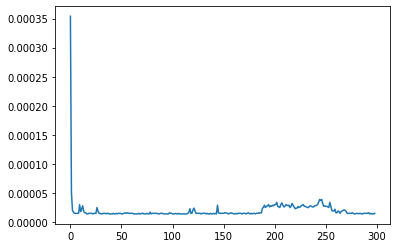

In [21]:
from pylab import plot, show
plot(arrayTime)
show() 

![](TiempoEj.png)

### 2. Eliminación de Ruido de Señales

Una aplicación de la FFT es eliminar el ruido de baja amplitud de las señales. En esta tarea, escribirá un script de Python para simular la eliminación de ruido con la FFT. Los pasos en el script son los siguientes:

1. tomar muestras de una señal exacta;
2. a la señal muestreada, agregue números pequeños;
3. aplique la transformada de Fourier y elimine aquellos componentes que tienen amplitudes bajas; 
4. aplique la transformada inversa de Fourier después de eliminar componentes de baja amplitud;
5. compare el resultado con la señal exacta original.

Puedes probar su script en cualquier dato aleatorio. Para un experimento más realista, puede usar el módulo de sonido de `scitools` y comparar la señal original, la ruidosa y la reconstruida escuchando.

### 1. Tomar muestras de una señal exacta
Señal: $7· \cos(5 · 2\pi t) + 10 \sin (8· 2\pi t)$

6.999999999999999*cos(5*2*pi*t)
10.0*sin(8*2*pi*t)


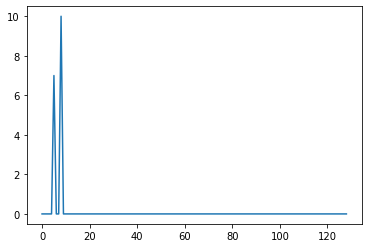

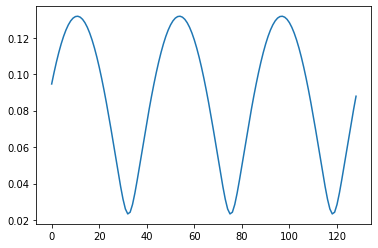

In [22]:
import numpy as np

f = lambda t: 7*np.cos(5*2*np.pi*t) + 10*np.sin(8*2*np.pi*t) 
n = 256
x = np.arange(0.0,1.0,1.0/n)
s = f(x)
F = np.fft.rfft(s)
A = np.fft.ifft(F)
m = n / 2
p = lambda z: (abs(np.real(z)) / m, abs(np.imag(z)) / m)
t = p(F)
tol = 1.0e-8

for i in range(0,len(t[0])):
    if t[0][i] > tol:
        print(str(t[0][i]) + '*cos(' + str(i) + '*2*pi*t)')
    if t[1][i] > tol:
        print(str(t[1][i]) + '*sin(' + str(i) + '*2*pi*t)')

import matplotlib.pyplot as plt 
plt.plot(abs(F)/m)
plt.show()
plt.plot(abs(A)/m)


### 2. A la señal muestreada, agregue números pequeños

3.0000000000000004*cos(7*2*pi*t)
5.0*sin(10*2*pi*t)


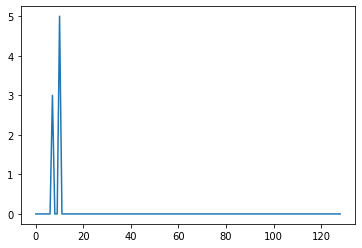

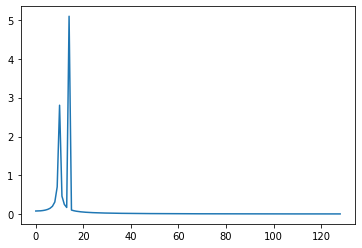

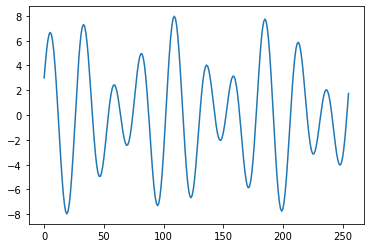

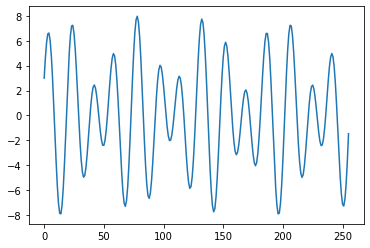

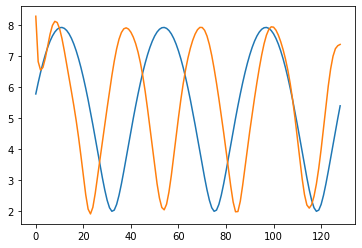

In [24]:
import numpy as np
import matplotlib.pyplot as plt 

f = lambda t: 3*np.cos(7*2*np.pi*t) + 5*np.sin(10*2*np.pi*t) 
n = 256
x = np.arange(0.0,1.0,1.0/n)
w = np.arange(0.0,0.4,0.4/n)
a = x+w
s = f(x)
b = f(a)
F = np.fft.rfft(s)
B = np.fft.rfft(b)
IF = np.fft.ifft(F)
IB = np.fft.ifft(B)
m = n / 2
p = lambda z: (abs(np.real(z)) / m, abs(np.imag(z)) / m)
t = p(F)
tol = 1.0e-8

for i in range(0,len(t[0])):
    if t[0][i] > tol:
        print(str(t[0][i]) + '*cos(' + str(i) + '*2*pi*t)')
    if t[1][i] > tol:
        print(str(t[1][i]) + '*sin(' + str(i) + '*2*pi*t)')


plt.plot(abs(F)/m)
plt.show()
plt.plot(abs(B)/m)
plt.show()
plt.plot(s)
plt.show()
plt.plot(b)
plt.show()
plt.plot(abs(IF))
plt.plot(abs(IB))

### 3. Aplique la transformada de Fourier y elimine aquellos componentes que tienen amplitudes bajas

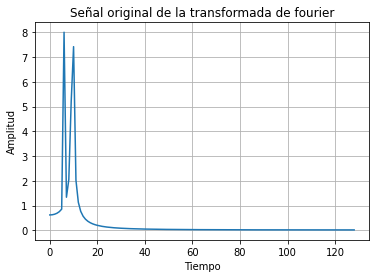

In [25]:
f = lambda t: 7*np.cos(5*2*np.pi*t) + 10*np.sin(8*2*np.pi*t) 
n = 256
x = np.arange(0.0,1.0,1.0/n)
w = np.arange(0.0,0.2,0.2/n)
s = f(x)
a = x+w
b = f(a)
F = np.fft.rfft(b)
m = n / 2
p = lambda z: (abs(np.real(z)) / m, abs(np.imag(z)) / m)
t = p(F)
tol = 1.0e-8

for i in range(0,len(t[0])):
    if t[0][i] > tol:
        (str(t[0][i]) + '*cos(' + str(i) + '*2*pi*t)')
    if t[1][i] > tol:
        (str(t[1][i]) + '*sin(' + str(i) + '*2*pi*t)')


plt.title("Señal original de la transformada de fourier");
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.plot(abs(F)/m)
plt.show()

### 4. aplique la transformada inversa de Fourier después de eliminar componentes de baja amplitud;

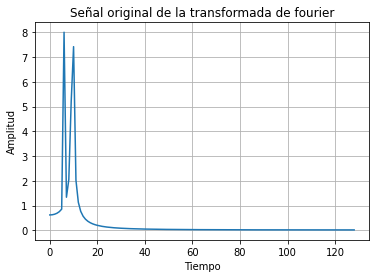

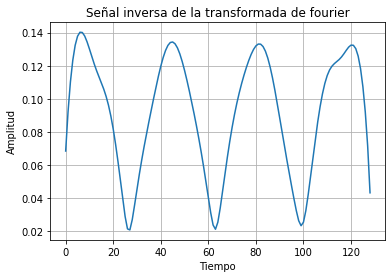

In [26]:
f = lambda t: 7*np.cos(5*2*np.pi*t) + 10*np.sin(8*2*np.pi*t)
n = 256
x = np.arange(0.0,1.0,1.0/n)
w = np.arange(0.0,0.2,0.2/n)
s = f(x)
a = x+w
b = f(a)
F = np.fft.rfft(b)
A = np.fft.ifft(F)
m = n / 2
p = lambda z: (abs(np.real(z)) / m, abs(np.imag(z)) / m)
t = p(F)
tol = 1.0e-8

for i in range(0,len(t[0])):
    if t[0][i] > tol:
        (str(t[0][i]) + '*cos(' + str(i) + '*2*pi*t)')
    if t[1][i] > tol:
        (str(t[1][i]) + '*sin(' + str(i) + '*2*pi*t)')


plt.title("Señal original de la transformada de fourier");
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.plot(abs(F)/m)
plt.show()

plt.title("Señal inversa de la transformada de fourier");
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.plot(abs(A)/m)
plt.show()


### 5. compare el resultado con la señal exacta original.

In [ ]:
import numpy as np

f = lambda t: 7*np.cos(5*2*np.pi*t) + 10*np.sin(8*2*np.pi*t) 
n = 256
x = np.arange(0.0,1.0,1.0/n)
y = np.arange(0.0,0.2,0.2/n)
u = x+y
s = f(u)

F = np.fft.rfft(s)
A = np.fft.ifft(F)

m = n / 2
p = lambda z: (abs(np.real(z)) / m, abs(np.imag(z)) / m)
t = p(F)
tol = 1.0e-8

for i in range(0,len(t[0])):
    if t[0][i] > tol:
        (str(t[0][i]) + '*cos(' + str(i) + '*2*pi*t)')
    if t[1][i] > tol:
        (str(t[1][i]) + '*sin(' + str(i) + '*2*pi*t)')

        
        
        
plt.title("Señal original de la transformada de fourier");
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.plot(abs(F)/m)
plt.show()

plt.title("Señal inversa de la transformada de fourier");
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.plot(abs(A)/m)
plt.show()

### 3. Convolución rápida

La transformada de Fourier convierte una convolución en un producto de componente. Interpretando las matrices como los vectores de coeficientes de dos polinomios (la entrada i-ésima es el coeficiente de xi), la convolución de los vectores de coeficientes da el vector de coeficientes del producto de los dos polinomios. Usando el FFT rápido, la operación $O(n^2)$ se convierte en $O(n · log2 (n))$. El siguiente script ilustra la convolución de dos matrices rellenadas con ceros suficientes:

Escriba un script de Python para demostrar el beneficio de realizar una convolución usando la FFT, usando tiempos en arreglos suficientemente grandes. Tenga en cuenta que el paquete de señal de scipy contiene la función `fftconvolve`.

In [31]:
import numpy as np
from numpy.fft import rfft, irfft 

a = np.array([6,5,4,0,0,0,0,0]) 
b = np.array([9,8,7,0,0,0,0,0]) 
print(np.convolve(a,b))

A = rfft(a)
B = rfft(b)
C = A * B
print(irfft(C))

[ 54  93 118  67  28   0   0   0   0   0   0   0   0   0   0]
[ 5.40000000e+01  9.30000000e+01  1.18000000e+02  6.70000000e+01
  2.80000000e+01 -7.10542736e-15  0.00000000e+00 -7.10542736e-15]


In [32]:
%timeit A
%timeit B
%timeit C
%timeit irfft(C)

22.4 ns ± 0.554 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
22.9 ns ± 0.893 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
23.2 ns ± 0.485 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
6.67 µs ± 542 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [34]:
import scipy
from scipy import signal

a = np.array([6,5,4,0,0,0,0,0]) 
b = np.array([9,8,7,0,0,0,0,0]) 
z=scipy.signal.convolve(a, b, mode='full')

print(z)


[ 54  93 118  67  28   0   0   0   0   0   0   0   0   0   0]


In [35]:
%timeit z

26.9 ns ± 2.14 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


#### La convolución rápida de FFT a través de los algoritmos de superposición de adición o guardado de superposición se puede hacer en memoria limitada utilizando una FFT que es solo un pequeño múltiplo (como 2X) más grande que la respuesta al impulso. Rompe la FFT larga en FFT más cortas, pero con relleno cero, correctamente superpuestas.
#### Incluso con la superposición de gastos generales, O (NlogN) vencerá a M * N en eficiencia para N y M. suficientemente grandes

## Beneficios del uso de la convolución
Para la solucion que se plantea a continuación, se convolucionan usando la librería numpy dos arreglos lo suficientemente grandes como para poder ver un cambio significativo en los tiempos.
Se obtienen también la transformada de ambos arreglos, se multiplican y se aplica la transformada inversa, buscando obtener el mismo resultado que con la función que implementa la librería de numpy

In [28]:
from numpy.fft import rfft, irfft
from random import randint

array1 = []
array2 = []

for _ in range(1, 300):
    array1.append(randint(0, 10))
    array2.append(randint(0, 10))

print(np.convolve(array1,array2))
A = rfft(array1)
B = rfft(array2)
C = A * B
print(irfft(C))


[  20   10   60   45   41  165   92  139  171  175  181  147  281  305
  145  381  417  323  411  527  475  511  581  596  592  598  635  615
  701  726  681  746  836  697  815  794  987  945  987  938 1005 1034
  920 1154 1099  982 1139 1342 1103 1261 1340 1278 1467 1403 1518 1478
 1232 1526 1534 1611 1597 1667 1666 1689 1731 1820 1611 1779 1752 1651
 1842 1846 1815 1929 2110 2086 1996 1964 2137 1920 2042 2065 2131 2147
 2158 2470 2377 2106 2529 2336 2215 2535 2294 2308 2632 2596 2722 2661
 2412 2726 2632 2795 2658 2776 2592 2753 2926 2897 2920 2925 2899 2814
 2906 3054 3069 2863 3227 3361 3090 3307 3366 3199 3218 3148 3363 3264
 3130 3368 3543 3555 3523 3656 3644 3669 3398 3416 3577 3465 3755 3779
 3898 3939 3866 4152 3970 3748 4019 3938 3819 4033 4055 4416 4297 4466
 4388 4595 4152 4186 4411 4385 4242 4490 4548 4548 4728 4482 4728 4612
 4282 4682 4595 4612 4767 4688 4769 4849 5009 4713 5020 4956 5174 4870
 5113 5190 5040 5155 4983 4830 5178 5081 5225 5147 5080 5240 5012 5686
 5392 

In [29]:
%timeit np.convolve(a,b)
%timeit rfft(a)
%timeit rfft(b)
%timeit A*B
%timeit irfft(C)

37.8 µs ± 2.03 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
7.42 µs ± 754 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
7.55 µs ± 453 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.38 µs ± 50.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
40.1 µs ± 1.41 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Conclusión 1

Efectivamente se puede comprobar que los métodos implementados por la librería son mucho más eficientes en términos de CPU, que los procedimientos que se implementan de manera manual. Los números lo demuestran: con np.convolve se obtuvo un tiempo promedio por ciclo de 37.8 us aproximadamente, mientras que con el procedimiento manual, se obtuvo un total aproximado de 56.45 us


### Usando Scipy
Se realiza el mismo procedimiento, usando la convolucion con FFT del módulo scipy, concretamente los métodos de convolve y fftconvolve . Se espera que este método sea mucho mas rapido que e lanterior (np.convolve). 


In [36]:
from scipy import signal
# array1 y array2 están definidos con anterioridad
arrayConvolve=scipy.signal.convolve(array1, array2, mode='full',method='direct')
arrayFFTConvolve=scipy.signal.fftconvolve(array1, array2, mode='full')
print(arrayConvolve)
print(arrayFFTConvolve)

[  20   10   60   45   41  165   92  139  171  175  181  147  281  305
  145  381  417  323  411  527  475  511  581  596  592  598  635  615
  701  726  681  746  836  697  815  794  987  945  987  938 1005 1034
  920 1154 1099  982 1139 1342 1103 1261 1340 1278 1467 1403 1518 1478
 1232 1526 1534 1611 1597 1667 1666 1689 1731 1820 1611 1779 1752 1651
 1842 1846 1815 1929 2110 2086 1996 1964 2137 1920 2042 2065 2131 2147
 2158 2470 2377 2106 2529 2336 2215 2535 2294 2308 2632 2596 2722 2661
 2412 2726 2632 2795 2658 2776 2592 2753 2926 2897 2920 2925 2899 2814
 2906 3054 3069 2863 3227 3361 3090 3307 3366 3199 3218 3148 3363 3264
 3130 3368 3543 3555 3523 3656 3644 3669 3398 3416 3577 3465 3755 3779
 3898 3939 3866 4152 3970 3748 4019 3938 3819 4033 4055 4416 4297 4466
 4388 4595 4152 4186 4411 4385 4242 4490 4548 4548 4728 4482 4728 4612
 4282 4682 4595 4612 4767 4688 4769 4849 5009 4713 5020 4956 5174 4870
 5113 5190 5040 5155 4983 4830 5178 5081 5225 5147 5080 5240 5012 5686
 5392 

In [37]:
%timeit arrayConvolve
%timeit arrayFFTConvolve

28.6 ns ± 1.7 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
25.3 ns ± 2.1 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


### Conclusión 2
Se observa que, como se esperaba, las funciones propias del módulo scipy, son mucho más eficientes ala hora de  hacer cálculos con gran cantidad de datos.

## Referencia

[1] P.N. Swarztrauber. Vectorizing the FFTs. In Parallel Computations, edited by G. Rodrigue, pages 51–83, Academic Press, 1982.
[2]NUMERICAL RECIPES The Art of Scientific Computing Third Edition

[3] How to apply a FIR filter: convolve, fftconvolve, convolve1d or lfilter? - Scipy CookBook